# Framework *Apache Spark + Map + Flatmap*

https://github.com/pirple/Data-Mining-With-Python/blob/master/Part%204/Section_3.1_3.2.ipynb

In [27]:
#libs and pyspark init 
import pyspark.sql.functions as F
import pyspark as ps
from pyspark import SQLContext  

spark = ps.sql.SparkSession.builder \
    .master('local[2]') \
    .appName('spark-ml') \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [28]:
nba_data = 'Data/nba_all_seasons.csv'

In [29]:
# read CSV Map, for this homework is Ok.
#     .filter(lambda x: (x.find("1996-97") == -1))#\ ###testing

def is_CHIseason96to99(data):
#     if (data.season == "1997-96"):
    data = str(data)
#     if (("1996-97", "1997-9") in data):
#     if ("1996-97" in data[100:-1]):
    if ("CHI|" in data):
        if ("1996-97|" in data):
            return True
        else:
            if ("1997-98|" in data):
                return True
            else:
                if ("1998-99" in data):
                    return True
                else:
                    return False
    else:
        return False

df_map = sc.textFile(nba_data)\
    .map(lambda x: x.split())\
    .take(2)

#     .filter(lambda x: "1996-97" in x)\ ###testing
df_map_count = sc.textFile(nba_data)\
    .map(lambda x: x.split())\
    .filter(is_CHIseason96to99)\
    .count()

# type(df_map) #df.head(2)
df_map[0], df_map[1], df_map[0], df_map_count
df_map_count
# print(df_map)



0

In [30]:
# read CSV Spark
df_aapl = sqlContext.read.csv(nba_data,
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

df_aapl.show(5) #df.head(2)

+---+-----------------+-----------------+----+-------------+-------------+--------------------+-------+----------+-----------+------------+---+---+----+---+----------+-------------------+-------------------+-------------------+-------------------+-------------------+-------+
|_c0|      player_name|team_abbreviation| age|player_height|player_weight|             college|country|draft_year|draft_round|draft_number| gp|pts| reb|ast|net_rating|           oreb_pct|           dreb_pct|            usg_pct|             ts_pct|            ast_pct| season|
+---+-----------------+-----------------+----+-------------+-------------+--------------------+-------+----------+-----------+------------+---+---+----+---+----------+-------------------+-------------------+-------------------+-------------------+-------------------+-------+
|  0|    Dennis Rodman|              CHI|36.0|       198.12|     99.79024|Southeastern Okla...|    USA|      1986|          2|          27| 55|5.7|16.1|3.1|      16.1|0.186

In [31]:
df_aapl.schema #df.info()

StructType(List(StructField(_c0,IntegerType,true),StructField(player_name,StringType,true),StructField(team_abbreviation,StringType,true),StructField(age,DoubleType,true),StructField(player_height,DoubleType,true),StructField(player_weight,DoubleType,true),StructField(college,StringType,true),StructField(country,StringType,true),StructField(draft_year,StringType,true),StructField(draft_round,StringType,true),StructField(draft_number,StringType,true),StructField(gp,IntegerType,true),StructField(pts,DoubleType,true),StructField(reb,DoubleType,true),StructField(ast,DoubleType,true),StructField(net_rating,DoubleType,true),StructField(oreb_pct,DoubleType,true),StructField(dreb_pct,DoubleType,true),StructField(usg_pct,DoubleType,true),StructField(ts_pct,DoubleType,true),StructField(ast_pct,DoubleType,true),StructField(season,StringType,true)))

In [32]:
#(Where) Filter from Chicago Bulls "1996-97", "1997-98", "1998-99" seasson.
df_aapl = df_aapl.filter("team_abbreviation == 'CHI' AND season IN ('1996-97', '1997-98', '1998-99')")
# df_aapl.show(5)
df_aapl.count()

45

In [33]:
# df_out = df_aapl.select('Species', 'SepalWidthCm').groupBy("Species").orderBy('Species', ascending=False).show(5)
# df_count = df_aapl.groupBy("Species").count().orderBy('Species', ascending=True)
# df_count.show(5)
df_aapl.count(), df_aapl.show()

+---+---------------+-----------------+----+-------------+------------------+--------------------+-------+----------+-----------+------------+---+----+----+---+----------+--------------------+-------------------+-------------------+-------------------+-------------------+-------+
|_c0|    player_name|team_abbreviation| age|player_height|     player_weight|             college|country|draft_year|draft_round|draft_number| gp| pts| reb|ast|net_rating|            oreb_pct|           dreb_pct|            usg_pct|             ts_pct|            ast_pct| season|
+---+---------------+-----------------+----+-------------+------------------+--------------------+-------+----------+-----------+------------+---+----+----+---+----------+--------------------+-------------------+-------------------+-------------------+-------------------+-------+
|  0|  Dennis Rodman|              CHI|36.0|       198.12|          99.79024|Southeastern Okla...|    USA|      1986|          2|          27| 55| 5.7|16.1|3

(45, None)

https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=agg#pyspark.sql.GroupedData

## Define a d_names (player_name distinct) and create data frames with pts, reb, ast to join

In [34]:
mainId = "player_name"
# d_names = df_aapl.groupBy("player_name").count().orderBy('player_name', ascending=True)
# d_names = df_aapl.groupBy("season", "player_name").count().orderBy('season', 'player_name', ascending=True)
d_names = df_aapl.groupBy(mainId) #.agg(sum("pts") # ().orderBy('season', 'player_name', ascending=True)
# d_names.show(5)
# sorted(d_names.agg({"pts": "count", "pts": "count"}).collect())
# d_names.agg({"pts": "count", "pts": "avg"}).show()
d_n = d_names.agg({"pts": "avg"})

d_pts = d_names.agg(F.avg('pts').alias('pts_avg'))
d_reb = d_names.agg({"reb": "avg"})
d_ast = d_names.agg({"ast": "avg"})

In [35]:
#join dataframes
d_all = d_pts.join(d_reb, mainId)
d_all = d_all.join(d_ast, mainId)

In [36]:
d_all = d_all.orderBy(mainId, ascending=True)
# type(d_new)
d_all.show()

+----------------+------------------+------------------+------------------+
|     player_name|           pts_avg|          avg(reb)|          avg(ast)|
+----------------+------------------+------------------+------------------+
|     Andrew Lang|               3.8|               4.4|               0.6|
| Bill Wennington|3.9666666666666663|1.9666666666666668|0.5333333333333333|
|      Bison Dele|               7.0|               3.7|               1.3|
|     Brent Barry|              11.1|               3.9|               3.1|
|Charles R. Jones|               3.7|               1.4|               1.4|
|  Corey Benjamin|               3.9|               1.3|               0.3|
|       Cory Carr|               4.1|               1.2|               1.6|
|   Dennis Rodman|               5.2|             15.55|               3.0|
| Dickey Simpkins| 4.766666666666667| 3.533333333333333|               0.9|
|    Jason Caffey|               7.3|               4.0|               1.2|
|      Joe K

## Ploting

In [37]:
#Libs
# import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt

<AxesSubplot:>

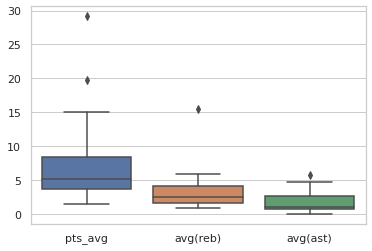

In [58]:
# sns.boxplot(data = d_all)
sns.boxplot(data = d_all.toPandas())
# sns.boxplot(data = df_aapl.toPandas())

[Text(0, 0, 'Scott Burrell'),
 Text(1, 0, 'Robert Parish'),
 Text(2, 0, 'Steve Kerr'),
 Text(3, 0, 'Dickey Simpkins'),
 Text(4, 0, 'Randy Brown'),
 Text(5, 0, 'Corey Benjamin'),
 Text(6, 0, 'Matt Steigenga'),
 Text(7, 0, 'Kornel David'),
 Text(8, 0, 'Toni Kukoc'),
 Text(9, 0, 'Andrew Lang'),
 Text(10, 0, 'Bison Dele'),
 Text(11, 0, 'Keith Booth'),
 Text(12, 0, 'Mark Bryant'),
 Text(13, 0, 'Dennis Rodman'),
 Text(14, 0, 'Charles R. Jones'),
 Text(15, 0, 'Rusty LaRue'),
 Text(16, 0, 'Bill Wennington'),
 Text(17, 0, 'Scottie Pippen'),
 Text(18, 0, 'Joe Kleine'),
 Text(19, 0, 'Michael Jordan'),
 Text(20, 0, 'Cory Carr'),
 Text(21, 0, 'Jud Buechler'),
 Text(22, 0, 'Brent Barry'),
 Text(23, 0, 'Jason Caffey'),
 Text(24, 0, 'Ron Harper'),
 Text(25, 0, 'Luc Longley'),
 Text(26, 0, 'Mario Bennett')]

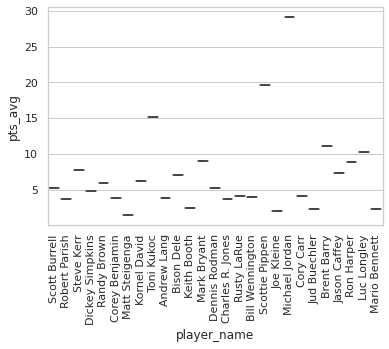

In [74]:
# sns.set_theme(style="whitegrid")
plot1 = sns.boxplot(x="player_name", y="pts_avg", data = d_pts.toPandas())
# plot1.set_xticklabels(rotation=45)
plot1.set_xticklabels(d_pts.toPandas()["player_name"], rotation=90)
# sns.boxplot(data = [1,2,3,4])

## Xtra - Testing udf functions

In [ ]:
def test(name):
        return "Erni"+name

In [ ]:
# from pyspark.sql.functions import rand
# d_n = d_n.withColumn("m", rand())
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
udfTest = udf(test, StringType())
d_n = d_n.withColumn("m", udfTest("player_name"))
d_n.show(1)

In [ ]:
#doing https://stackoverflow.com/questions/35322764/apache-spark-assign-the-result-of-udf-to-multiple-dataframe-columns
df = sc.parallelize([(1, 2.0), (2, 3.0)]).toDF(["x", "y"])
df.show()

In [ ]:
d_names.show(5)

In [ ]:
dfAverage = df_aapl.join(d_names, Seq("seasson", "player_name")).groupBy(d_names("season", "player_name")).agg(avg(df_aapl("pts")).as("average")).select("season", "player_name", "average")

In [ ]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

# assemble values in a vector
vectorAssembler = VectorAssembler(inputCols=["count"], outputCol="Eh")


df_vector = vectorAssembler.transform(df_count)
df_vector = df_count.transform(df_count)
df_count.show(5)

df_vector.show(5)

## From: https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/

In [ ]:
simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

In [ ]:
# simpleData = df_count.show()

# schema = ["Species","count","state","salary","age","bonus"]
# df = spark.createDataFrame(data=simpleData, schema = schema)
# df.printSchema()
df.show(truncate=False)